                                               Employee Fitment

                                Amazon Hiring : Bussness Research Analyst - 1  (Assignment)

In [258]:
try:
    import os
    from sklearn.linear_model import LinearRegression
    from sklearn.svm import SVR
    from sklearn.ensemble import AdaBoostRegressor,BaggingRegressor,ExtraTreesRegressor,GradientBoostingRegressor
    from sklearn.neighbors import KNeighborsRegressor
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.ensemble import RandomForestRegressor
    from lightgbm import LGBMRegressor
    from catboost import CatBoostRegressor
    import numpy as np
    from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,KFold,train_test_split
    import warnings
    warnings.filterwarnings('ignore')
    from sklearn.metrics import roc_auc_score
    import statsmodels.api as sm
    import numpy as np
    import matplotlib.pyplot as plt
    %matplotlib inline
    import seaborn as sns
    sns.set_style('whitegrid')
    plt.style.use('seaborn-deep')
    plt.style.use('fivethirtyeight')
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.serif'] = 'Ubuntu'
    plt.rcParams['font.monospace'] = 'Ubuntu Mono'
    plt.rcParams['font.size'] = 10
    plt.rcParams['axes.labelsize'] = 12
    plt.rcParams['axes.titlesize'] = 12
    plt.rcParams['xtick.labelsize'] = 8
    plt.rcParams['ytick.labelsize'] = 8
    plt.rcParams['legend.fontsize'] = 12
    plt.rcParams['figure.titlesize'] = 14
    plt.rcParams['figure.figsize'] = (12, 8)
    import warnings
    warnings.filterwarnings('ignore')
    import sklearn.base as skb
    import sklearn.metrics as skm
    import sklearn.model_selection as skms
    import sklearn.preprocessing as skp
    import sklearn.utils as sku
    import sklearn.linear_model as sklm
    from sklearn.impute import KNNImputer
    import sklearn.neighbors as skn
    import sklearn.ensemble as ske
    import catboost as cb
    import scipy.stats as sstats
    import pandas as pd
    import random
    seed = 12
    np.random.seed(seed)
    from datetime import date
    print("Hey Great, all libraries dependencies are successfully Installed.")
except Exception as e:
    print("Message:  Oh! Library {} is not installed or having same issues.".format(str(e)))
    print("\n\n Please Install this  module name  {} using pip command ".format(str(e)[-20:]))

Hey Great, all libraries dependencies are successfully Installed.


# Data Importing  from localhost using Class-Function methods.

In [179]:
class file_importing():
    import os
    try:
        def file_importing(self,file_path):
            if "xlsx" in str(file_path) or "xls" in str(file_path):
                df=pd.read_excel(file_path)
                return df
            elif "csv" in str(file_path):
                df=pd.read_csv(file_path)
                return df
            else:
                print("Hey! You are not using any file")
            
    except Exception as ex:
        print("Error Excetion type: ",str(ex))
import pandas as pd
entries = os.listdir()
with os.scandir(r'Test') as entries:
    for entry in entries:
        test=file_importing().file_importing(entry)
with os.scandir('Train') as entries:
    for entry in entries:
        train=file_importing().file_importing(entry)


# method : seprate the data into numerical and categorical form

In [180]:
def split_data_into_cat_and_num(dataframe):
    numerical_data=dataframe.select_dtypes(include=np.number)
    categorical_data=dataframe.select_dtypes(exclude=np.number)
    return numerical_data,categorical_data

    

# Method: Finding co-related columns in which are co-related more than 0.70 

In [181]:
def generate_correlated_columns(dataframe,thres):
    column_having_correlation=set()
    cor_relation_matrix=numerical_data.corr()
    for i in range(len(cor_relation_matrix.columns)):
        for j in range(i):
            if cor_relation_matrix.iloc[i,j]>thres:
                column_having_correlation.add(cor_relation_matrix.columns[i])
    return column_having_correlation

#  Method : data transformation : normal distribution :- remove skewed_data

In [182]:
def reduce_skewness(dataframe):
    for i in range(len(dataframe.columns)):
        if dataframe[dataframe.columns[i]].skew()>0:
            dataframe[dataframe.columns[i]]=dataframe[dataframe.columns[i]].map(lambda i: np.log(i) if i > 0 else 0) 
        else:
            continue

    return dataframe

In [183]:

numerical_data,categorical_data=split_data_into_cat_and_num(train)

numerical_data_test,categorical_data_test=split_data_into_cat_and_num(test)


In [184]:
categorical_data.shape,numerical_data.shape

((13645, 12), (13645, 10))


# numeric data analysis

In [185]:
numerical_data=numerical_data.drop(['EmpID'],1)

In [186]:
numerical_data.head()

Age  LatestDegreeCGPA  YearsOfExperince  GraduationYear  CurrentCTC  \
0   35                 7                12            2009          21   
1   26                 7                 3            2018          15   
2   36                 6                 6            2015          15   
3   29                 5                 6            2015          16   
4   25                 8                 2            2019          24   

   ExpectedCTC  EmpScore  TotalLeavesTaken  FitmentPercent  
0           26         5                20           95.40  
1           19         5                 6           67.09  
2           24         5                19           91.26  
3           24         5                16           72.29  
4           32         5                10           86.34

In [187]:
categorical_data.columns

Index(['EmpName', 'LanguageOfCommunication', 'Gender',
       'JobProfileIDApplyingFor', 'HighestDegree', 'DegreeBranch',
       'GraduatingInstitute', 'MartialStatus', 'CurrentDesignation',
       'CurrentCompanyType', 'DepartmentInCompany', 'BiasInfluentialFactor'],
      dtype='object')

# Outliers data point visualiization using BOXPLOT

No handles with labels found to put in legend.


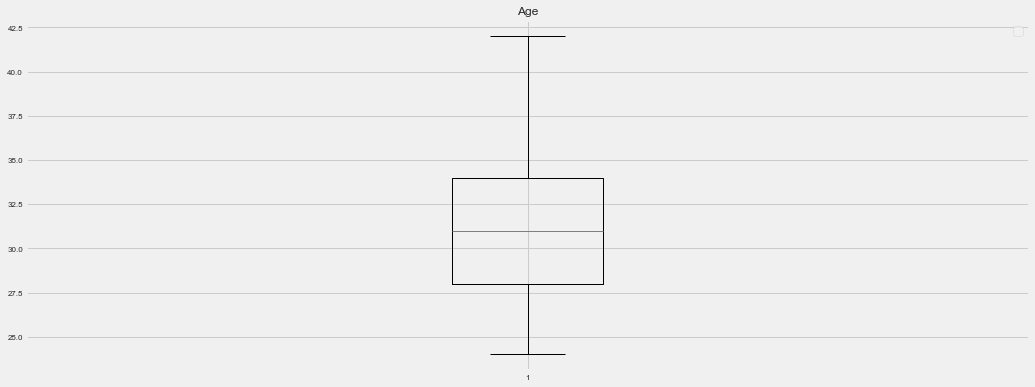

No handles with labels found to put in legend.


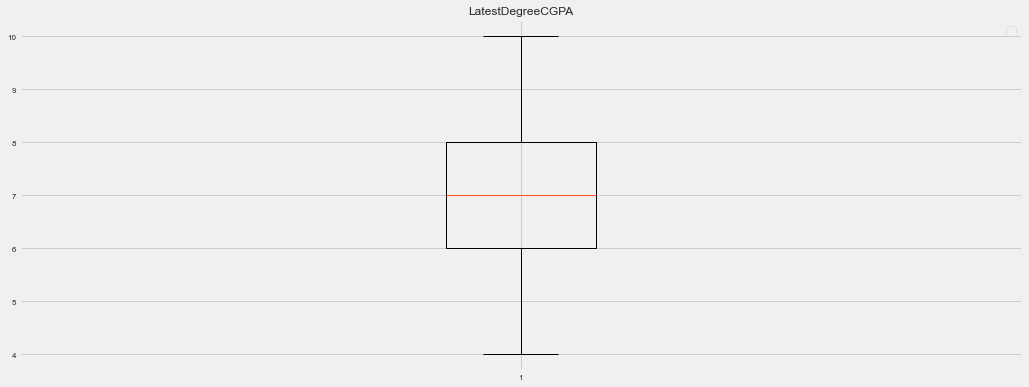

No handles with labels found to put in legend.


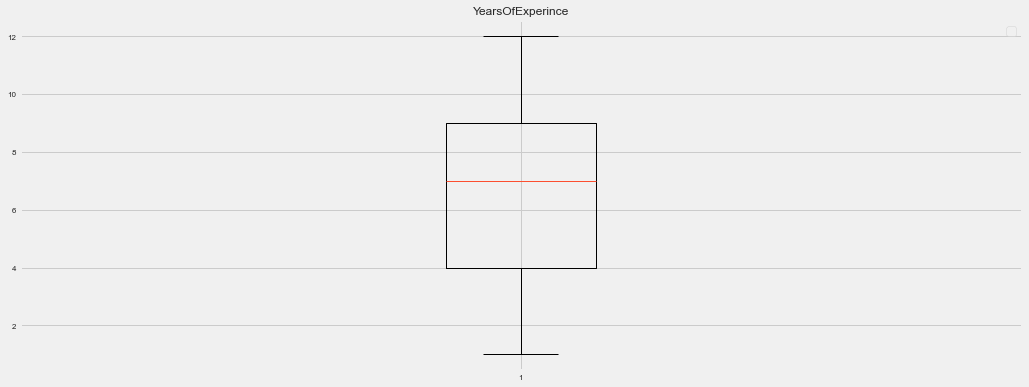

No handles with labels found to put in legend.


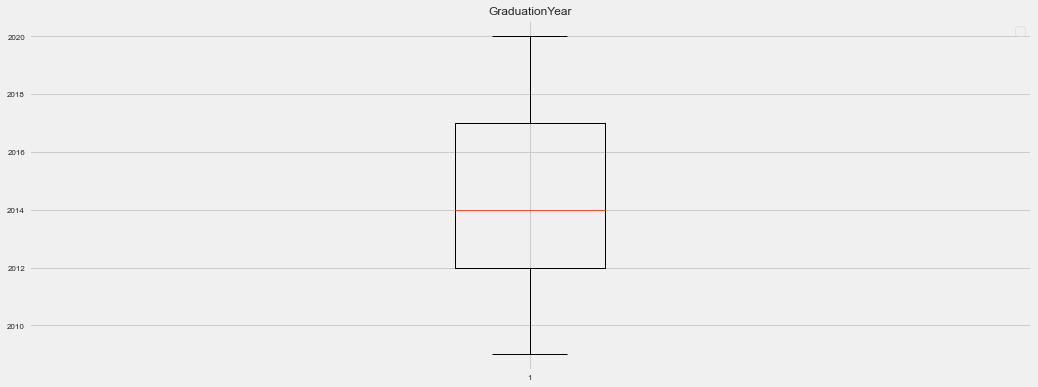

No handles with labels found to put in legend.


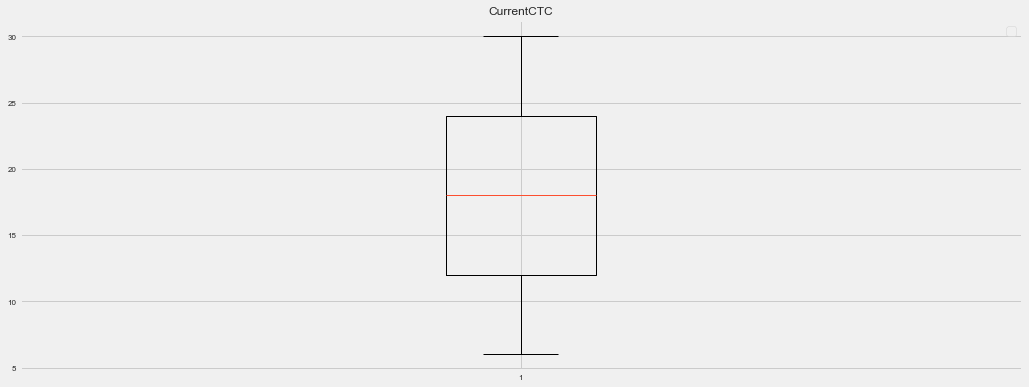

No handles with labels found to put in legend.


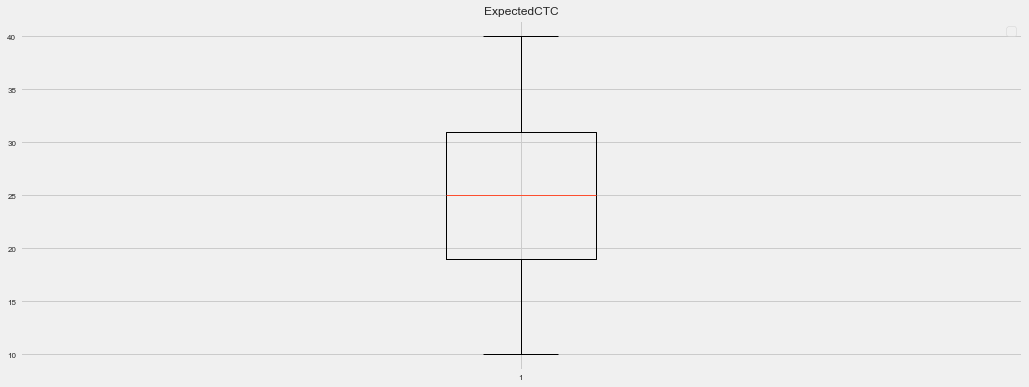

No handles with labels found to put in legend.


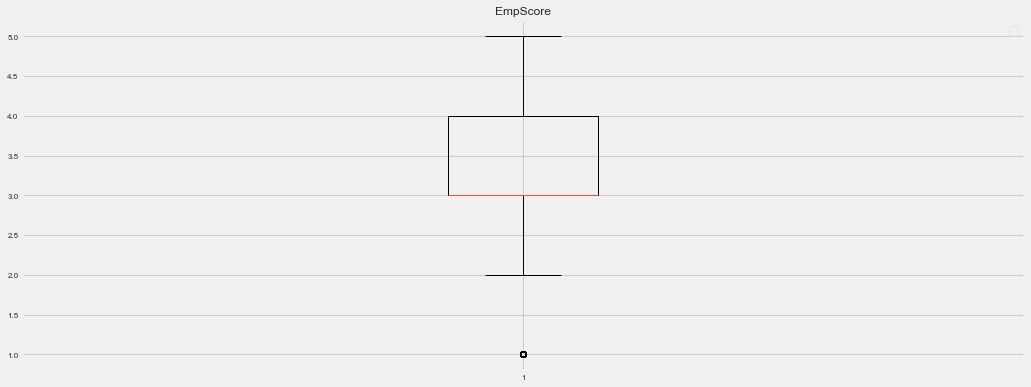

No handles with labels found to put in legend.


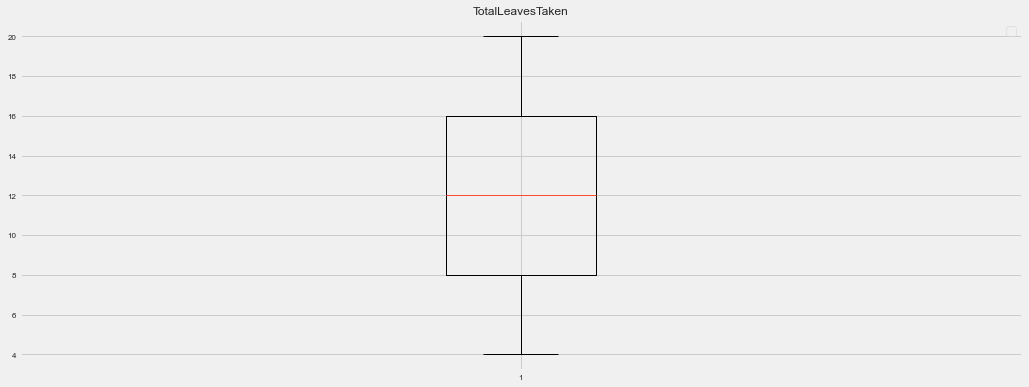

No handles with labels found to put in legend.


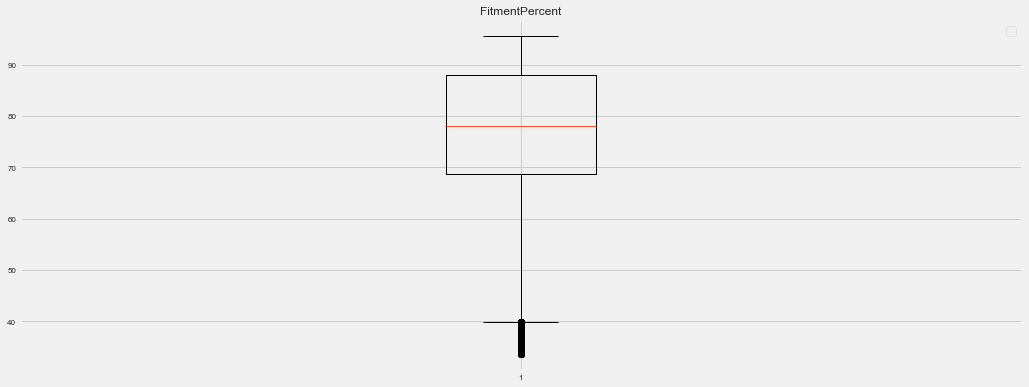

In [188]:
def Outliers_visualization_using_boxplot(dataframe,column_name):
    fig = plt.figure(figsize=(16, 6))
    box_plot=plt.boxplot(dataframe[column_name])
    title=plt.title(str(column_name))
    legend=plt.legend()
    return box_plot,title,legend
for i in range(len(numerical_data.columns)):
    Outliers_visualization_using_boxplot(numerical_data,numerical_data.columns[i])
    plt.show()

#     ax[0,1].boxplot(numerical_data.LatestDegreeCGPA)
#     ax[0,1].set_title("LatestDegreeCGPA")

#     ax[1,0].boxplot(numerical_data.YearsOfExperince)
#     ax[1,0].set_title("YearsOfExperince")

#     ax[1,1].boxplot(numerical_data.GraduationYear)
#     ax[1,1].set_title("GraduationYear")

#     ax[2,0].boxplot(numerical_data.CurrentCTC)
#     ax[2,0].set_title("CurrentCTC")

#     ax[2,1].boxplot(numerical_data.ExpectedCTC)
#     ax[2,1].set_title("ExpectedCTC")

#     ax[3,0].boxplot(numerical_data.EmpScore)
#     ax[3,0].set_title("EmpScore")

#     ax[3,1].boxplot(numerical_data.TotalLeavesTaken)
#     ax[3,1].set_title("TotalLeavesTaken")

#     ax[4,0].boxplot(numerical_data.FitmentPercent)
#     ax[4,0].set_title("FitmentPercent")
    



In [189]:
numerical_data.corr() # printing corelation matrix

Age  LatestDegreeCGPA  YearsOfExperince  \
Age               1.000000         -0.016065          0.879819   
LatestDegreeCGPA -0.016065          1.000000         -0.017794   
YearsOfExperince  0.879819         -0.017794          1.000000   
GraduationYear   -0.879819          0.017794         -1.000000   
CurrentCTC       -0.002504         -0.000750         -0.004947   
ExpectedCTC      -0.002661          0.000851         -0.007795   
EmpScore          0.001010         -0.005073         -0.002773   
TotalLeavesTaken  0.002090          0.003413          0.001517   
FitmentPercent   -0.014188          0.011049         -0.008466   

                  GraduationYear  CurrentCTC  ExpectedCTC  EmpScore  \
Age                    -0.879819   -0.002504    -0.002661  0.001010   
LatestDegreeCGPA        0.017794   -0.000750     0.000851 -0.005073   
YearsOfExperince       -1.000000   -0.004947    -0.007795 -0.002773   
GraduationYear          1.000000    0.004947     0.007795  0.002773   
CurrentCTC              0.004947    1.000000     0.963368  0.007050   
ExpectedCTC             0.007795    0.963368     1.000000  0.005020   
EmpScore                0.002773    0.007050     0.005020  1.000000   
TotalLeavesTaken       -0.001517   -0.015754    -0.017024  0.008744   
FitmentPercent          0.008466    0.139495     0.133717  0.140494   

                  TotalLeavesTaken  FitmentPercent  
Age                       0.002090       -0.014188  
LatestDegreeCGPA          0.003413        0.011049  
YearsOfExperince          0.001517       -0.008466  
GraduationYear           -0.001517        0.008466  
CurrentCTC               -0.015754        0.139495  
ExpectedCTC              -0.017024        0.133717  
EmpScore                  0.008744        0.140494  
TotalLeavesTaken          1.000000       -0.013438  
FitmentPercent           -0.013438        1.000000

In [190]:
numerical_data.Age.unique().tolist(),numerical_data.YearsOfExperince.unique().tolist()# check unique value of Age column

([35, 26, 36, 29, 25, 31, 32, 28, 30, 27, 34, 33, 24, 37, 38, 42, 41, 40, 39],
 [12, 3, 6, 2, 1, 9, 8, 5, 4, 7, 11, 10])

In [191]:
correlation_feature=generate_correlated_columns(numerical_data,0.8)
correlation_feature # corelated columns

{'ExpectedCTC', 'YearsOfExperince'}

In [192]:
after_remove_co_related_data=numerical_data.drop(['ExpectedCTC', 'YearsOfExperince'],1) # remove co-related column from dataset.

<AxesSubplot:>

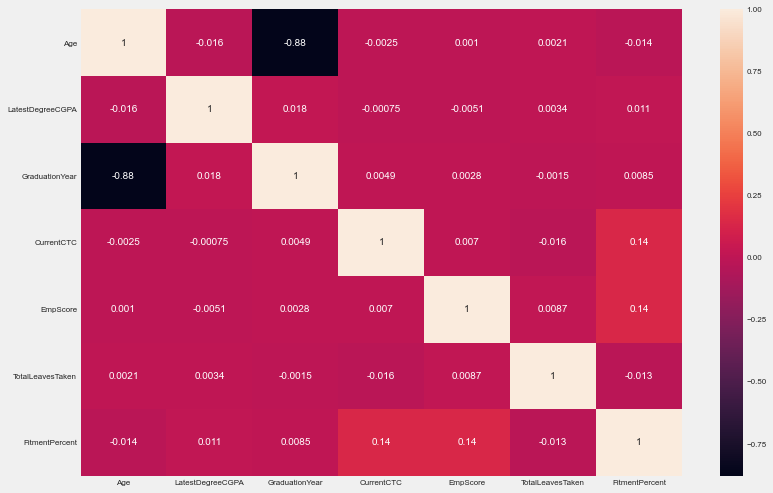

In [193]:
sns.heatmap(after_remove_co_related_data.corr(),annot=True)

In [194]:
# firstly we ignoring high corelated fetures,

In [195]:
skewed_features = after_remove_co_related_data.apply(lambda x: x.skew()).sort_values(ascending=False)
skewed_features # skewed value of each column of dataframe

Age                 0.162296
GraduationYear      0.015501
TotalLeavesTaken    0.010280
CurrentCTC         -0.010166
LatestDegreeCGPA   -0.402332
EmpScore           -0.404885
FitmentPercent     -0.966175
dtype: float64

In [196]:
after_remove_co_related_data.describe() # checking statistics details of dataset.

Age  LatestDegreeCGPA  GraduationYear    CurrentCTC  \
count  13645.000000      13645.000000    13645.000000  13645.000000   
mean      30.691242          7.100257     2014.452254     18.076951   
std        3.881378          1.346539        3.426920      7.208130   
min       24.000000          4.000000     2009.000000      6.000000   
25%       28.000000          6.000000     2012.000000     12.000000   
50%       31.000000          7.000000     2014.000000     18.000000   
75%       34.000000          8.000000     2017.000000     24.000000   
max       42.000000         10.000000     2020.000000     30.000000   

           EmpScore  TotalLeavesTaken  FitmentPercent  
count  13645.000000      13645.000000    13645.000000  
mean       3.392085         11.967021       75.880093  
std        1.044676          4.897836       14.894207  
min        1.000000          4.000000       33.530000  
25%        3.000000          8.000000       68.720000  
50%        3.000000         12.000000       78.110000  
75%        4.000000         16.000000       87.990000  
max        5.000000         20.000000       95.500000

In [197]:
#checking outliers using inter-quartile-range method
Q1 = after_remove_co_related_data.quantile(0.25)
Q3 = after_remove_co_related_data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Age                  6.00
LatestDegreeCGPA     2.00
GraduationYear       5.00
CurrentCTC          12.00
EmpScore             1.00
TotalLeavesTaken     8.00
FitmentPercent      19.27
dtype: float64


# features engineering.....


In [198]:
after_remove_co_related_data.head()

Age  LatestDegreeCGPA  GraduationYear  CurrentCTC  EmpScore  \
0   35                 7            2009          21         5   
1   26                 7            2018          15         5   
2   36                 6            2015          15         5   
3   29                 5            2015          16         5   
4   25                 8            2019          24         5   

   TotalLeavesTaken  FitmentPercent  
0                20           95.40  
1                 6           67.09  
2                19           91.26  
3                16           72.29  
4                10           86.34

In [199]:
after_remove_co_related_data.Age.value_counts(sort=True)

32    1207
34    1157
33    1140
29    1140
35    1122
31    1112
28    1105
27    1100
30    1060
26     744
25     733
24     721
37     375
38     365
36     353
41      62
40      56
39      52
42      41
Name: Age, dtype: int64

In [200]:
min(after_remove_co_related_data.Age),max(after_remove_co_related_data.Age)

(24, 42)

In [201]:
after_remove_co_related_data[(after_remove_co_related_data.Age>=24) & (after_remove_co_related_data.Age<=31)].skew()

Age                -0.214202
LatestDegreeCGPA   -0.403309
GraduationYear     -0.160756
CurrentCTC         -0.018954
EmpScore           -0.394605
TotalLeavesTaken    0.007316
FitmentPercent     -0.975828
dtype: float64

In [202]:
after_remove_co_related_data[(after_remove_co_related_data.Age>31) & (after_remove_co_related_data.Age<=36)].skew()

Age                 0.158411
LatestDegreeCGPA   -0.392157
GraduationYear      1.024479
CurrentCTC          0.000090
EmpScore           -0.408552
TotalLeavesTaken    0.029166
FitmentPercent     -0.967389
dtype: float64

In [203]:
after_remove_co_related_data[(after_remove_co_related_data.Age>36)].skew()

Age                 1.407798
LatestDegreeCGPA   -0.448057
GraduationYear      1.463783
CurrentCTC          0.007738
EmpScore           -0.468010
TotalLeavesTaken   -0.065623
FitmentPercent     -0.883281
dtype: float64

In [204]:
cor=after_remove_co_related_data.corr()
#Correlation with output variable
cor_target = abs(cor["FitmentPercent"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features # by this target variale not haing any corelated independent feature

FitmentPercent    1.0
Name: FitmentPercent, dtype: float64

# Backward Elimination : feature selection

In [205]:
X=after_remove_co_related_data.drop(['FitmentPercent'],1)
y=after_remove_co_related_data.FitmentPercent

In [206]:
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['CurrentCTC', 'EmpScore']


<AxesSubplot:>

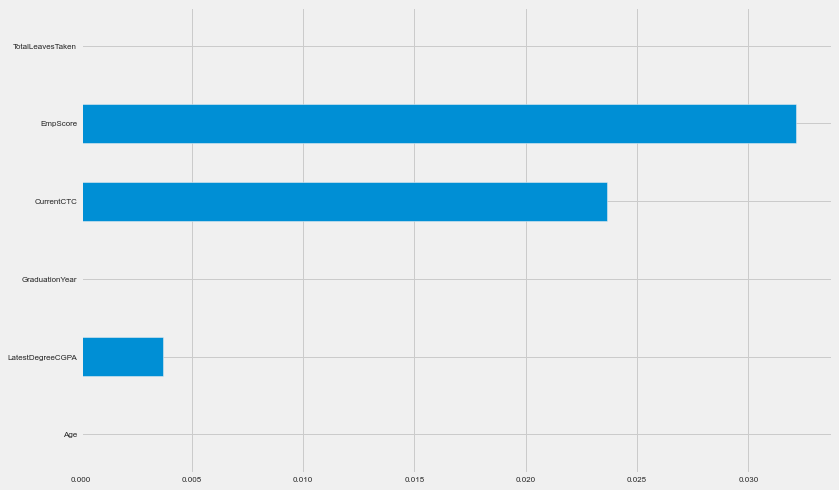

In [207]:
from sklearn.feature_selection import mutual_info_regression
important_feature=mutual_info_regression(X,y)
pd.Series(important_feature,index=X.columns).plot(kind='barh') # according to the this technique only 2 feature are importnat.

In [208]:
categorical_data.head()

EmpName LanguageOfCommunication  Gender JobProfileIDApplyingFor  \
0     John                 English    Male                 JR85289   
1  William                 English    Male                 JR87525   
2    James                 English  Female                 JR87525   
3  Charles                 English  Female                 JR87525   
4   George                 English    Male                 JR70175   

  HighestDegree             DegreeBranch GraduatingInstitute MartialStatus  \
0        B.Tech               Electrical              Tier 1       Married   
1        B.Tech  Artificial Intelligence              Tier 3       Married   
2           PhD         Computer Science              Tier 1        Single   
3           BCA   Information Technology              Tier 2       Married   
4   Dual M.Tech         Computer Science              Tier 3       Married   

  CurrentDesignation CurrentCompanyType DepartmentInCompany  \
0                SSE         Enterprise              Design   
1                 BA           MidSized         Engineering   
2                SDE           MidSized         Engineering   
3                SDE            Startup             Product   
4                SDE         Enterprise         Engineering   

  BiasInfluentialFactor  
0      YearsOfExperince  
1                   NaN  
2                Gender  
3                Gender  
4          DegreeBranch

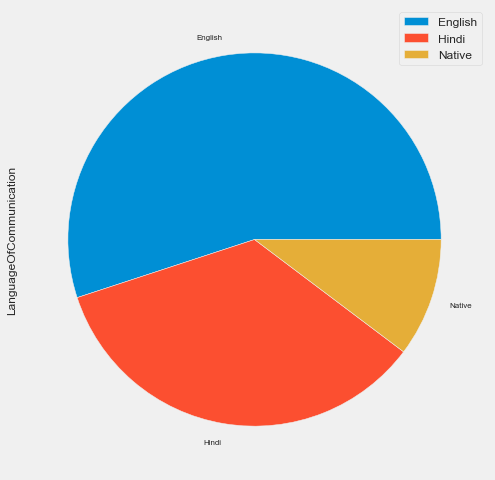

In [209]:
categorical_data.LanguageOfCommunication.value_counts().plot(kind="pie")
plt.legend()

In [210]:
from sklearn.preprocessing import OneHotEncoder

In [211]:
categorical_data.head()

EmpName LanguageOfCommunication  Gender JobProfileIDApplyingFor  \
0     John                 English    Male                 JR85289   
1  William                 English    Male                 JR87525   
2    James                 English  Female                 JR87525   
3  Charles                 English  Female                 JR87525   
4   George                 English    Male                 JR70175   

  HighestDegree             DegreeBranch GraduatingInstitute MartialStatus  \
0        B.Tech               Electrical              Tier 1       Married   
1        B.Tech  Artificial Intelligence              Tier 3       Married   
2           PhD         Computer Science              Tier 1        Single   
3           BCA   Information Technology              Tier 2       Married   
4   Dual M.Tech         Computer Science              Tier 3       Married   

  CurrentDesignation CurrentCompanyType DepartmentInCompany  \
0                SSE         Enterprise              Design   
1                 BA           MidSized         Engineering   
2                SDE           MidSized         Engineering   
3                SDE            Startup             Product   
4                SDE         Enterprise         Engineering   

  BiasInfluentialFactor  
0      YearsOfExperince  
1                   NaN  
2                Gender  
3                Gender  
4          DegreeBranch

In [212]:
categorical_data=categorical_data.drop(['EmpName'],1)

In [213]:
# creating dummy data of categorical features
def create_dummies_data(dataframe,feature_list):
    dummies_data=pd.get_dummies(dataframe[feature_list])
    return dummies_data

In [214]:
def check_frequancies_in_each_feature(dataframe,features_list):
    for i in range(len(features_list)):
        print("feature name {} having frequencies \n".format(dataframe.columns[i]),dataframe[dataframe.columns[i]].value_counts(),"\n\n")

In [215]:
check_frequancies_in_each_feature(categorical_data,categorical_data.columns.tolist())

feature name LanguageOfCommunication having frequencies 
 English    7510
Hindi      4733
Native     1402
Name: LanguageOfCommunication, dtype: int64 


feature name Gender having frequencies 
 Male      8376
Female    4326
Other      943
Name: Gender, dtype: int64 


feature name JobProfileIDApplyingFor having frequencies 
 JR85289    4697
JR87525    3416
JR88879    1231
JR89890    1157
JR88873    1123
JR81165     681
JR79193     678
JR88654     420
JR70175     242
Name: JobProfileIDApplyingFor, dtype: int64 


feature name HighestDegree having frequencies 
 B.Tech         5619
M.Tech         2026
BCA            1634
MS             1579
Dual M.Tech    1358
Dual MBA        665
PhD             624
MCA             140
Name: HighestDegree, dtype: int64 


feature name DegreeBranch having frequencies 
 Computer Science              4749
Information Technology        2993
Artificial Intelligence       2001
Electrical                    1803
Electronics                   1699
Electrical and 

In [216]:
# approx each features having more than 2 frequency so,we have to generate dummies data .
dummies_data=create_dummies_data(categorical_data,categorical_data.columns.tolist())

In [217]:
dummies_data

LanguageOfCommunication_English  LanguageOfCommunication_Hindi  \
0                                    1                              0   
1                                    1                              0   
2                                    1                              0   
3                                    1                              0   
4                                    1                              0   
...                                ...                            ...   
13640                                1                              0   
13641                                0                              0   
13642                                0                              1   
13643                                0                              1   
13644                                1                              0   

       LanguageOfCommunication_Native  Gender_Female  Gender_Male  \
0                                   0              0            1   
1                                   0              0            1   
2                                   0              1            0   
3                                   0              1            0   
4                                   0              0            1   
...                               ...            ...          ...   
13640                               0              1            0   
13641                               1              0            0   
13642                               0              0            1   
13643                               0              0            1   
13644                               0              0            1   

       Gender_Other  JobProfileIDApplyingFor_JR70175  \
0                 0                                0   
1                 0                                0   
2                 0                                0   
3                 0                                0   
4                 0                                1   
...             ...                              ...   
13640             0                                0   
13641             1                                0   
13642             0                                0   
13643             0                                0   
13644             0                                0   

       JobProfileIDApplyingFor_JR79193  JobProfileIDApplyingFor_JR81165  \
0                                    0                                0   
1                                    0                                0   
2                                    0                                0   
3                                    0                                0   
4                                    0                                0   
...                                ...                              ...   
13640                                0                                0   
13641                                0                                0   
13642                                0                                0   
13643                                0                                0   
13644                                0                                0   

       JobProfileIDApplyingFor_JR85289  ...  DepartmentInCompany_Product  \
0                                    1  ...                            0   
1                                    0  ...                            0   
2                                    0  ...                            0   
3                                    0  ...                            1   
4                                    0  ...                            0   
...                                ...  ...                          ...   
13640                                0  ...                            0   
13641                                0  ...                            0   
13642                                0  ...

In [218]:
preparing_training_data=after_remove_co_related_data.join(dummies_data)

In [219]:
preparing_training_data

Age  LatestDegreeCGPA  GraduationYear  CurrentCTC  EmpScore  \
0       35                 7            2009          21         5   
1       26                 7            2018          15         5   
2       36                 6            2015          15         5   
3       29                 5            2015          16         5   
4       25                 8            2019          24         5   
...    ...               ...             ...         ...       ...   
13640   25                 7            2019          30         3   
13641   29                 7            2015          22         4   
13642   37                 8            2010           8         4   
13643   24                 4            2020          27         4   
13644   35                 7            2009          17         3   

       TotalLeavesTaken  FitmentPercent  LanguageOfCommunication_English  \
0                    20           95.40                                1   
1                     6           67.09                                1   
2                    19           91.26                                1   
3                    16           72.29                                1   
4                    10           86.34                                1   
...                 ...             ...                              ...   
13640                 5           93.65                                1   
13641                14           52.90                                0   
13642                20           61.46                                0   
13643                 7           93.64                                0   
13644                16           93.52                                1   

       LanguageOfCommunication_Hindi  LanguageOfCommunication_Native  ...  \
0                                  0                               0  ...   
1                                  0                               0  ...   
2                                  0                               0  ...   
3                                  0                               0  ...   
4                                  0                               0  ...   
...                              ...                             ...  ...   
13640                              0                               0  ...   
13641                              0                               1  ...   
13642                              1                               0  ...   
13643                              1                               0  ...   
13644                              0                               0  ...   

       DepartmentInCompany_Product  BiasInfluentialFactor_CurrentCompanyType  \
0                                0                                         0   
1                                0                                         0   
2                                0                                         0   
3                                1                                         0   
4                                0                                         0   
...                            ...                                       ...   
13640                            0                                         0   
13641                            0                                         0   
13642                            0                                         1   
13643                            0                                         0   
13644                            0                                         0   

       BiasInfluentialFactor_DegreeBranch  BiasInfluentialFactor_EmpScore  \
0                                       0                               0   
1                                       0                               0   
2                                       0                               0   
3                                       0                  

In [220]:
X=preparing_training_data.drop('FitmentPercent',1)

In [221]:
y=preparing_training_data.FitmentPercent

In [289]:
from sklearn.preprocessing import StandardScaler,MaxAbsScaler,MinMaxScaler

In [290]:
X_=MinMaxScaler().fit_transform(X)

In [291]:
# X_=X.drop('GraduationYear',1)

In [302]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=30)

# Creating the object of each regression based model.

In [303]:
model1=RandomForestRegressor()
model2=LinearRegression()
model3=SVR()
model4=LGBMRegressor()
model5=LinearRegression()
model6=AdaBoostRegressor()
model7=BaggingRegressor()
model8=ExtraTreesRegressor()
model9=GradientBoostingRegressor()
model10=AdaBoostRegressor()
model11=BaggingRegressor()
model12=ExtraTreesRegressor()
model13=KNeighborsRegressor()
model14=DecisionTreeRegressor()

# Fitting the models by using training data-set

In [309]:
model15=CatBoostRegressor()
model15.fit(x_train,y_train)
#model2.fit(x_train,y_train)
model1.fit(x_train,y_train)
#model3.fit(x_train,y_train)
model4.fit(x_train,y_train)
# model5.fit(x_train,y_train)
# model6.fit(x_train,y_train)
# model7.fit(x_train,y_train)
# model8.fit(x_train,y_train)
# model9.fit(x_train,y_train)
# model10.fit(x_train,y_train)
model11.fit(x_train,y_train)
#model12.fit(x_train,y_train)
#model13.fit(x_train,y_train)
#model14.fit(x_train,y_train)



# pred=model.predict(x_test)
# from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
# from sklearn.metrics import mean_absolute_error,r2_score
# mean_absolute_error(y_test,pred),r2_score(y_test,pred)


Learning rate set to 0.058324
0:	learn: 14.3873628	total: 8.23ms	remaining: 8.23s
1:	learn: 13.8711970	total: 15.4ms	remaining: 7.71s
2:	learn: 13.3965021	total: 22.9ms	remaining: 7.6s
3:	learn: 12.9730903	total: 32.2ms	remaining: 8.03s
4:	learn: 12.5219559	total: 39.6ms	remaining: 7.89s
5:	learn: 12.1174859	total: 46.6ms	remaining: 7.72s
6:	learn: 11.7673497	total: 54.5ms	remaining: 7.74s
7:	learn: 11.4577601	total: 62.5ms	remaining: 7.74s
8:	learn: 11.1227876	total: 70.3ms	remaining: 7.74s
9:	learn: 10.8242139	total: 78ms	remaining: 7.72s
10:	learn: 10.5519342	total: 85.5ms	remaining: 7.68s
11:	learn: 10.3116434	total: 92.7ms	remaining: 7.63s
12:	learn: 10.0753984	total: 100ms	remaining: 7.61s
13:	learn: 9.8533026	total: 108ms	remaining: 7.6s
14:	learn: 9.6817935	total: 116ms	remaining: 7.6s
15:	learn: 9.4934928	total: 123ms	remaining: 7.56s
16:	learn: 9.3451402	total: 130ms	remaining: 7.51s
17:	learn: 9.2081353	total: 137ms	remaining: 7.46s
18:	learn: 9.0709326	total: 144ms	remainin

164:	learn: 6.7374392	total: 1.45s	remaining: 7.33s
165:	learn: 6.7342899	total: 1.46s	remaining: 7.31s
166:	learn: 6.7299619	total: 1.46s	remaining: 7.29s
167:	learn: 6.7278155	total: 1.47s	remaining: 7.27s
168:	learn: 6.7242411	total: 1.47s	remaining: 7.25s
169:	learn: 6.7216263	total: 1.48s	remaining: 7.22s
170:	learn: 6.7185457	total: 1.49s	remaining: 7.2s
171:	learn: 6.7165072	total: 1.49s	remaining: 7.18s
172:	learn: 6.7130229	total: 1.5s	remaining: 7.16s
173:	learn: 6.7102395	total: 1.5s	remaining: 7.14s
174:	learn: 6.7080316	total: 1.51s	remaining: 7.12s
175:	learn: 6.7059869	total: 1.52s	remaining: 7.11s
176:	learn: 6.7042022	total: 1.52s	remaining: 7.08s
177:	learn: 6.7017837	total: 1.53s	remaining: 7.07s
178:	learn: 6.6985315	total: 1.54s	remaining: 7.06s
179:	learn: 6.6947462	total: 1.55s	remaining: 7.04s
180:	learn: 6.6926375	total: 1.55s	remaining: 7.03s
181:	learn: 6.6905377	total: 1.56s	remaining: 7.01s
182:	learn: 6.6883851	total: 1.57s	remaining: 6.99s
183:	learn: 6.6

339:	learn: 6.3225038	total: 2.67s	remaining: 5.18s
340:	learn: 6.3198153	total: 2.68s	remaining: 5.18s
341:	learn: 6.3181667	total: 2.69s	remaining: 5.17s
342:	learn: 6.3157912	total: 2.69s	remaining: 5.16s
343:	learn: 6.3139098	total: 2.7s	remaining: 5.15s
344:	learn: 6.3115060	total: 2.71s	remaining: 5.14s
345:	learn: 6.3097423	total: 2.72s	remaining: 5.13s
346:	learn: 6.3074736	total: 2.72s	remaining: 5.13s
347:	learn: 6.3045431	total: 2.73s	remaining: 5.12s
348:	learn: 6.3023140	total: 2.74s	remaining: 5.11s
349:	learn: 6.3004354	total: 2.75s	remaining: 5.1s
350:	learn: 6.2988329	total: 2.75s	remaining: 5.09s
351:	learn: 6.2969014	total: 2.76s	remaining: 5.08s
352:	learn: 6.2955263	total: 2.77s	remaining: 5.07s
353:	learn: 6.2927790	total: 2.77s	remaining: 5.06s
354:	learn: 6.2908034	total: 2.78s	remaining: 5.05s
355:	learn: 6.2889131	total: 2.79s	remaining: 5.04s
356:	learn: 6.2858345	total: 2.79s	remaining: 5.03s
357:	learn: 6.2842143	total: 2.8s	remaining: 5.02s
358:	learn: 6.2

519:	learn: 5.9835577	total: 3.92s	remaining: 3.62s
520:	learn: 5.9808109	total: 3.94s	remaining: 3.62s
521:	learn: 5.9797855	total: 3.95s	remaining: 3.62s
522:	learn: 5.9786162	total: 3.96s	remaining: 3.61s
523:	learn: 5.9768374	total: 3.97s	remaining: 3.61s
524:	learn: 5.9748959	total: 3.99s	remaining: 3.61s
525:	learn: 5.9730804	total: 4s	remaining: 3.6s
526:	learn: 5.9711273	total: 4.01s	remaining: 3.6s
527:	learn: 5.9695214	total: 4.02s	remaining: 3.6s
528:	learn: 5.9680170	total: 4.03s	remaining: 3.59s
529:	learn: 5.9666273	total: 4.05s	remaining: 3.59s
530:	learn: 5.9651216	total: 4.06s	remaining: 3.58s
531:	learn: 5.9637626	total: 4.07s	remaining: 3.58s
532:	learn: 5.9615607	total: 4.08s	remaining: 3.58s
533:	learn: 5.9601460	total: 4.09s	remaining: 3.57s
534:	learn: 5.9575640	total: 4.1s	remaining: 3.57s
535:	learn: 5.9562327	total: 4.12s	remaining: 3.56s
536:	learn: 5.9547858	total: 4.13s	remaining: 3.56s
537:	learn: 5.9527170	total: 4.14s	remaining: 3.56s
538:	learn: 5.95074

686:	learn: 5.7081184	total: 5.78s	remaining: 2.63s
687:	learn: 5.7066093	total: 5.79s	remaining: 2.63s
688:	learn: 5.7053123	total: 5.8s	remaining: 2.62s
689:	learn: 5.7032428	total: 5.82s	remaining: 2.61s
690:	learn: 5.7015079	total: 5.83s	remaining: 2.61s
691:	learn: 5.7004162	total: 5.84s	remaining: 2.6s
692:	learn: 5.6983088	total: 5.85s	remaining: 2.59s
693:	learn: 5.6975902	total: 5.86s	remaining: 2.58s
694:	learn: 5.6959514	total: 5.87s	remaining: 2.58s
695:	learn: 5.6950025	total: 5.88s	remaining: 2.57s
696:	learn: 5.6931313	total: 5.89s	remaining: 2.56s
697:	learn: 5.6920729	total: 5.91s	remaining: 2.55s
698:	learn: 5.6903496	total: 5.92s	remaining: 2.55s
699:	learn: 5.6891200	total: 5.93s	remaining: 2.54s
700:	learn: 5.6871904	total: 5.94s	remaining: 2.53s
701:	learn: 5.6855185	total: 5.95s	remaining: 2.52s
702:	learn: 5.6840348	total: 5.96s	remaining: 2.52s
703:	learn: 5.6832149	total: 5.97s	remaining: 2.51s
704:	learn: 5.6816456	total: 5.98s	remaining: 2.5s
705:	learn: 5.6

856:	learn: 5.4580223	total: 7.66s	remaining: 1.28s
857:	learn: 5.4570491	total: 7.67s	remaining: 1.27s
858:	learn: 5.4561394	total: 7.68s	remaining: 1.26s
859:	learn: 5.4543563	total: 7.69s	remaining: 1.25s
860:	learn: 5.4532436	total: 7.7s	remaining: 1.24s
861:	learn: 5.4518039	total: 7.71s	remaining: 1.23s
862:	learn: 5.4510563	total: 7.72s	remaining: 1.23s
863:	learn: 5.4500824	total: 7.73s	remaining: 1.22s
864:	learn: 5.4489938	total: 7.74s	remaining: 1.21s
865:	learn: 5.4476167	total: 7.75s	remaining: 1.2s
866:	learn: 5.4459083	total: 7.76s	remaining: 1.19s
867:	learn: 5.4438597	total: 7.77s	remaining: 1.18s
868:	learn: 5.4423707	total: 7.78s	remaining: 1.17s
869:	learn: 5.4411363	total: 7.79s	remaining: 1.16s
870:	learn: 5.4403185	total: 7.8s	remaining: 1.16s
871:	learn: 5.4393602	total: 7.82s	remaining: 1.15s
872:	learn: 5.4380035	total: 7.83s	remaining: 1.14s
873:	learn: 5.4367465	total: 7.84s	remaining: 1.13s
874:	learn: 5.4354247	total: 7.85s	remaining: 1.12s
875:	learn: 5.4

BaggingRegressor()

# checking training and testing accuracy of each trained model.

In [311]:
print(model1.score(x_train,y_train),model1.score(x_test,y_test)) #above average train - 97% test 79%
#print(model2.score(x_train,y_train),model2.score(x_test,y_test)) # average accuracy train -64% test 64%
#print(model3.score(x_train,y_train),model3.score(x_test,y_test))# not giving much accuracy--excluded
print(model4.score(x_train,y_train),model4.score(x_test,y_test))# good accuracy train  84% test 79%
#print(model5.score(x_train,y_train),model5.score(x_test,y_test)) # avearge
#print(model6.score(x_train,y_train),model6.score(x_test,y_test))#below average
#print(model7.score(x_train,y_train),model7.score(x_test,y_test))# above avearge
#print(model8.score(x_train,y_train),model8.score(x_test,y_test))# just aveage
#print(model9.score(x_train,y_train),model9.score(x_test,y_test))#average
#print(model10.score(x_train,y_train),model10.score(x_test,y_test)) # below average
print(model11.score(x_train,y_train),model11.score(x_test,y_test)) # above average
#print(model12.score(x_train,y_train),model12.score(x_test,y_test)) #  average
#print(model13.score(x_train,y_train),model13.score(x_test,y_test)) #very bad
#print(model14.score(x_train,y_train),model14.score(x_test,y_test)) #average
print(model15.score(x_train,y_train),model15.score(x_test,y_test)) # good

0.970862037334702 0.7969920320082231
0.8408750285671265 0.7956308667383348
0.9592098527299607 0.7784165637481679
0.8760843885802657 0.7875858498545667


In [313]:
pred1=model1.predict(x_test)
pred4=model4.predict(x_test)
pred11=model11.predict(x_test)
#pred12=model12.predict(x_test)
pred15=model15.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
print(mean_absolute_error(y_test,pred1),r2_score(y_test,pred1),mean_squared_error(y_test,pred1))
print(mean_absolute_error(y_test,pred4),r2_score(y_test,pred4),mean_squared_error(y_test,pred4))
print(mean_absolute_error(y_test,pred11),r2_score(y_test,pred11),mean_squared_error(y_test,pred11))
#print(mean_absolute_error(y_test,pred12),r2_score(y_test,pred12),mean_squared_error(y_test,pred12))
print(mean_absolute_error(y_test,pred15),r2_score(y_test,pred15),mean_squared_error(y_test,pred15))

5.2730947728382995 0.7969920320082231 43.79858457245237
5.350026329477174 0.7956308667383348 44.09225340121826
5.4601382510991705 0.7784165637481679 47.80620666536395
5.493535091309062 0.7875858498545667 45.82795055565112


# finally we are using RandomForest_Regressor,and LGBM regressor

In [318]:
RandomForestRegressor()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [340]:
def RandomForest_parameter_tuning(x_train_data,y_train_data):
    cv=KFold(n_splits=3,shuffle=False)
    # Number of trees in random forest
    n_estimators = [int(x) for x in np.linspace(200,2000,10)]
    # Number of features to consider at every split
    max_features = ["auto", "sqrt", "log2"]
    # Maximum number of levels in tree
    max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
    max_depth.append(None)
    # Minimum number of samples required to split a node
    min_samples_split = [2, 3, 5,6]
    # Minimum number of samples required at each leaf node
    min_samples_leaf = [1, 2, 4,6]
    # Method of selecting samples for training each tree
    bootstrap = [True, False]
    # Create the random grid
    criterion = ["mse", "mae"]
    #The function to measure the quality of a split. Supported criteria
    #are "mse" for the mean squared error, which is equal to variance
    #reduction as feature selection criterion, and "mae" for the mean
    #absolute error.
    random_grid = {'n_estimators': n_estimators,
                   'max_features': max_features,
                   'max_depth': max_depth,
                   'min_samples_split': min_samples_split,
                   'min_samples_leaf': min_samples_leaf,
                   'bootstrap': bootstrap,
                   'criterion': criterion
                  }
    Ranmz_cvobj= RandomizedSearchCV(estimator=RandomForestRegressor(),param_distributions=random_grid,n_iter=50,cv=cv,verbose=2,random_state=100)
    return Ranmz_cvobj.fit(x_train_data,y_train_data)

In [ ]:
tuned_model_wt_para=RandomForest_parameter_tuning(x_train,y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END bootstrap=True, criterion=mse, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   3.6s
[CV] END bootstrap=True, criterion=mse, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   3.4s
[CV] END bootstrap=True, criterion=mse, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   3.5s
[CV] END bootstrap=False, criterion=mse, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time=  44.4s
[CV] END bootstrap=False, criterion=mse, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time=  44.5s
[CV] END bootstrap=False, criterion=mse, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time=  44.5s
[CV] END bootstrap=F

In [ ]:
R

In [62]:
test_pred

Age  LatestDegreeCGPA  GraduationYear  CurrentCTC  EmpScore  \
0   35                 9            2009          25         4   

   TotalLeavesTaken  LanguageOfCommunication_English  \
0                10                                0   

   LanguageOfCommunication_Hindi  LanguageOfCommunication_Native  \
0                              0                               1   

   Gender_Female  ...  DepartmentInCompany_Product  \
0              0  ...                            0   

   BiasInfluentialFactor_CurrentCompanyType  \
0                                         0   

   BiasInfluentialFactor_DegreeBranch  BiasInfluentialFactor_EmpScore  \
0                                   0                               0   

   BiasInfluentialFactor_Ethinicity  BiasInfluentialFactor_Gender  \
0                                 0                             0   

   BiasInfluentialFactor_HighestDegree  \
0                                    0   

   BiasInfluentialFactor_LatestDegreeCGPA  \
0                                       0   

   BiasInfluentialFactor_MartialStatus  BiasInfluentialFactor_YearsOfExperince  
0                                    0                                       1  

[1 rows x 65 columns]

In [61]:
preparing_training_data.iloc[5,:10]


Age                                  35.00
LatestDegreeCGPA                      9.00
GraduationYear                     2009.00
CurrentCTC                           25.00
EmpScore                              4.00
TotalLeavesTaken                     10.00
FitmentPercent                       93.23
LanguageOfCommunication_English       0.00
LanguageOfCommunication_Hindi         0.00
LanguageOfCommunication_Native        1.00
Name: 5, dtype: float64

In [59]:
#test_pred=test_pred.drop('GraduationYear',1)

In [70]:
pred

array([92.4156])

In [98]:
pred[5]

39.91969999999996

In [103]:
y[5]

93.23

In [132]:
model1.predict(X_for_test)

array([88.2386])

In [128]:
y_for_test[0]

86.34

In [127]:
df_for_test
X_for_test=df_for_test.drop('FitmentPercent',1)
y_for_test=df_for_test.FitmentPercent

In [126]:
df_for_test=pd.DataFrame(test_data_pred,columns=preparing_training_data.columns)

In [125]:
test_data_pred[0][6]

86.34

In [119]:
test_data_pred=[preparing_training_data.iloc[4,:].values.tolist()]

## 